In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # sets a white grid background for plots. see documentation for details
%matplotlib inline

In [2]:
from pandas_datareader import DataReader #helps import data from Google or Yahoo Finance

In [3]:
from datetime import datetime

In [4]:
from __future__ import division # so as not to worry about fractions

In [5]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [6]:
# Setting up starting and ending time for grabbing data
end = datetime.now()
start = datetime(end.year-1,end.month,end.day) # Creating a variable storing the same date last year

In [7]:
# Grabbing finance data in a data frame
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo', start,end) # Check DataReader by pressing Shift+Tab
# globals() converts 'stock' to a global variable and so stock names become dataframes. In other words, the string names in
# the tech_list become data frames by using global()

In [8]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-05,205.080002,202.899994,203.350006,204.229996,17265500.0,201.821350
2019-07-08,201.399994,198.410004,200.809998,200.020004,25338600.0,197.661011
2019-07-09,201.509995,198.809998,199.199997,201.240005,20578000.0,198.866638
2019-07-10,203.729996,201.559998,201.850006,203.229996,17897100.0,200.833160
2019-07-11,204.389999,201.710007,203.309998,201.750000,20191800.0,199.370621


In [9]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,271.633532,265.379603,268.122540,268.801626,3.467758e+07,267.565202
std,46.626958,45.451342,45.911664,46.209842,1.717141e+07,46.757453
min,198.070007,192.580002,195.410004,193.339996,1.165440e+07,191.059784
25%,227.222504,222.342499,225.002506,224.269997,2.344208e+07,222.489388
50%,270.035004,263.840012,266.770004,267.010010,3.002775e+07,265.658676
75%,312.875008,305.210007,308.590004,309.562508,4.053645e+07,308.237091
max,372.380005,363.910004,367.850006,366.529999,1.067212e+08,366.529999


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-07-05 to 2020-07-02
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


In [11]:
AAPL.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

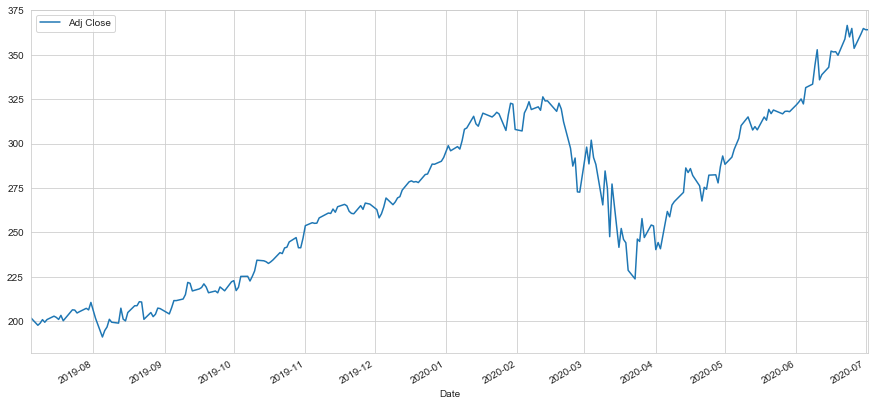

In [12]:
# Historical price analysis (Plotting adjusted closing price)
AAPL['Adj Close'].plot(legend=True,figsize=(15,7))

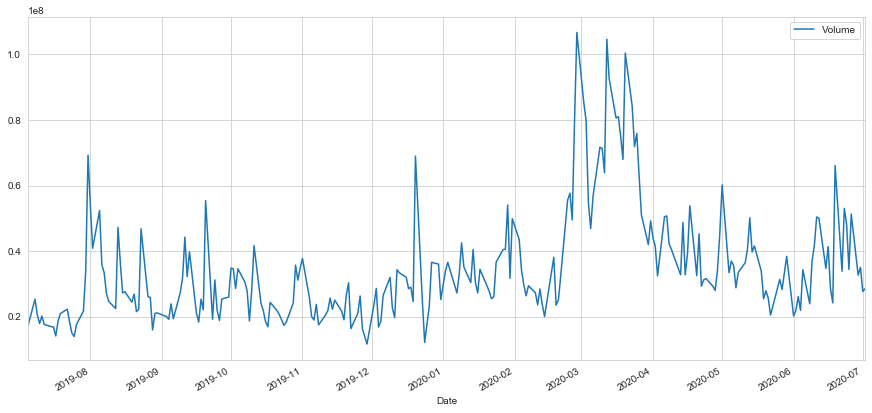

In [13]:
# Plotting total volume of apple stocks traded last year
AAPL['Volume'].plot(legend=True,figsize=(15,7))

In [14]:
# Calculating different moving averages for apple stock
ma_day = [10,20,50] #10,20 and 50-day moving average
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma)) # creating a column name for each of the moving averages that will be appended
                                              # to the AAPL data frame.
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()    

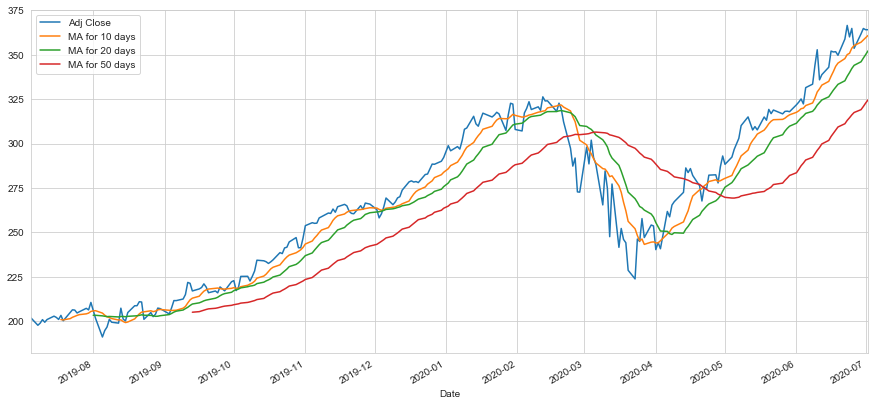

In [15]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,7))
# subplots=False results in all the trend lines getting plotted on a single plot instead of separate plots.

### Daily returns and risk of the stocks

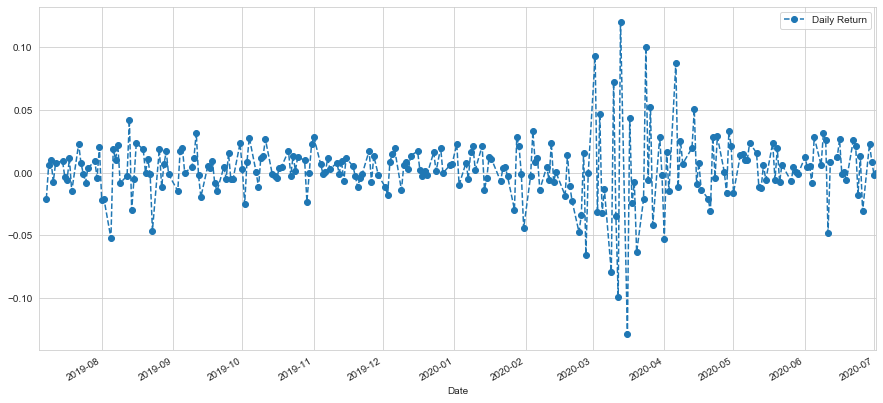

In [16]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(15,7),legend=True,linestyle='--',marker='o')

#### Average daily returns

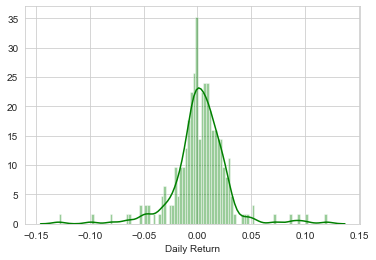

In [17]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='green')

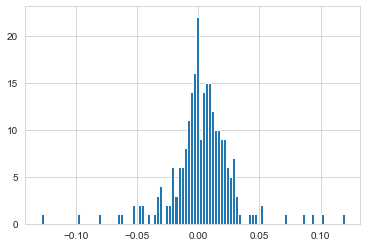

In [18]:
# Another way of doing the above
AAPL['Daily Return'].hist(bins=100)

### Analyzing the returns of all the stocks

In [19]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close'] 

# Creates a data frame consisting of adjusted closing price of all the stocks.

In [20]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-05,201.821350,1131.589966,135.393936,1942.910034
2019-07-08,197.661011,1116.349976,135.295151,1952.319946
2019-07-09,198.866638,1124.829956,134.801239,1988.300049
2019-07-10,200.833160,1140.479980,136.174347,2017.410034
2019-07-11,199.370621,1144.209961,136.717636,2001.069946


In [21]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-05,NaN,NaN,NaN,NaN
2019-07-08,-0.020614,-0.013468,-0.000730,0.004843
2019-07-09,0.006099,0.007596,-0.003651,0.018429
2019-07-10,0.009889,0.013913,0.010186,0.014641
2019-07-11,-0.007282,0.003271,0.003990,-0.008100


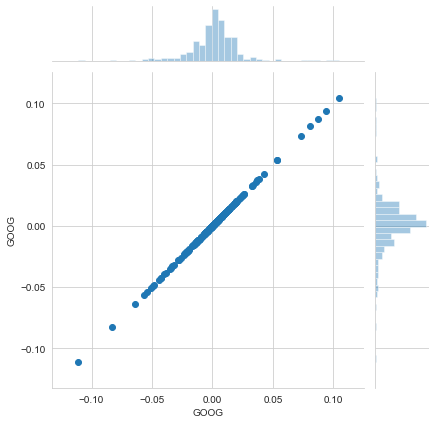

In [22]:
# Comparing stocks. Here, Google is compared with itself.
sns.jointplot('GOOG','GOOG',tech_rets)

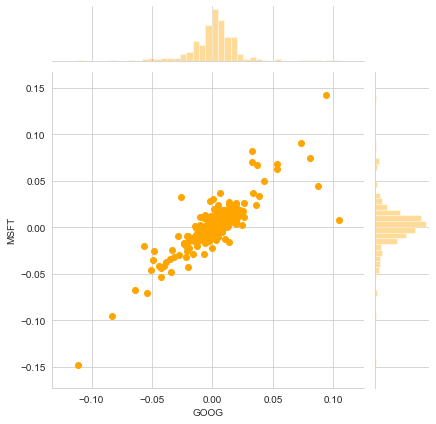

In [23]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='orange')

# The plot is mostly linearly increasing, so the two stocks are strongly positively correlated.

In [24]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-05,NaN,NaN,NaN,NaN
2019-07-08,-0.020614,-0.013468,-0.000730,0.004843
2019-07-09,0.006099,0.007596,-0.003651,0.018429
2019-07-10,0.009889,0.013913,0.010186,0.014641
2019-07-11,-0.007282,0.003271,0.003990,-0.008100


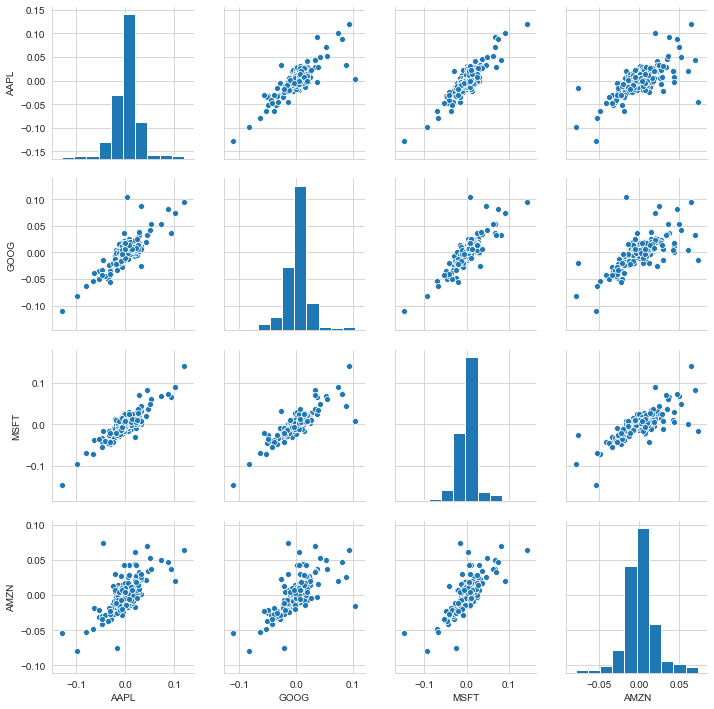

In [25]:
# Plotting histograms and comparing realtions between returns of two stocks

sns.pairplot(tech_rets.dropna())

In [26]:
# The above plot shows a strong correlation between the stocks of Apple and Google, Apple and Microsoft,
# Google and Microsoft and some correlation between Amazon and Microsoft.

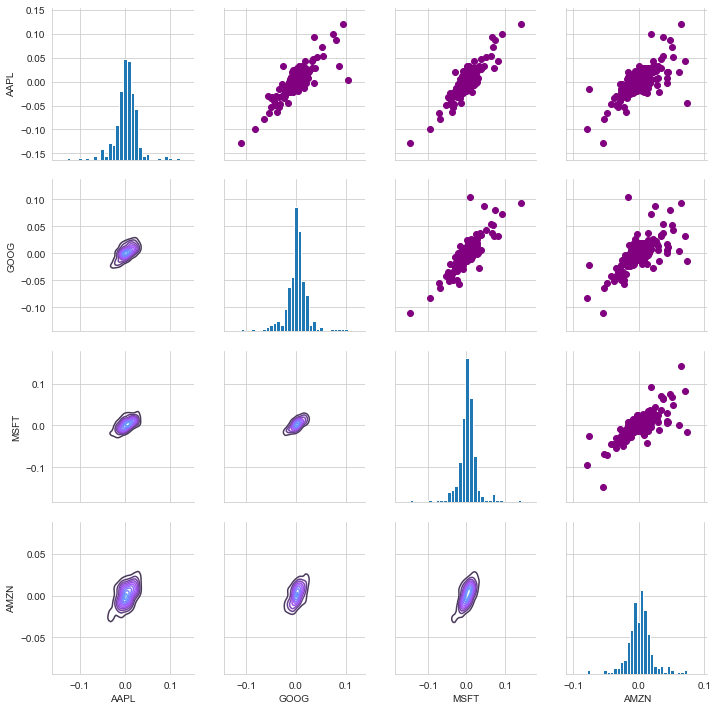

In [27]:
# Getting a better understanding using pairgrid
returns_fig = sns.PairGrid(tech_rets.dropna()) # pairplot is built on top of PairGrid
returns_fig.map_upper(plt.scatter,color='purple') # The upper half of the plot will be a scatter plot
returns_fig.map_lower(sns.kdeplot,cmap='cool_d') # The lower half of the plot will be a kde plot
returns_fig.map_diag(plt.hist,bins=30) # The diagonal will be a histogram and will have 30 bins

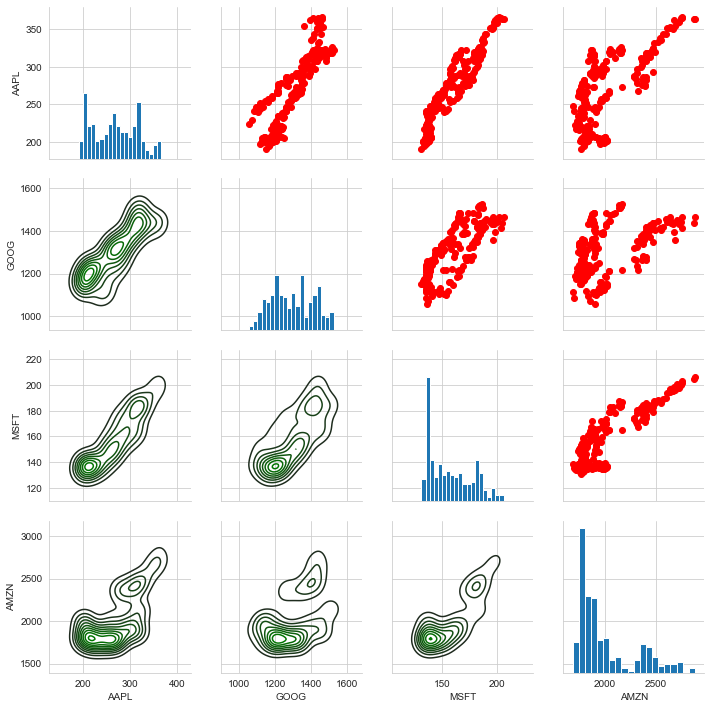

In [28]:
# Comparing the correlation between closing prices of the stocks

closing_fig = sns.PairGrid(closing_df.dropna())
closing_fig.map_upper(plt.scatter,color='red')
closing_fig.map_lower(sns.kdeplot,color='green')
closing_fig.map_diag(plt.hist,bins=20)

### Analysing the risk of a stock

Risk of a stock can be analyzed by looking at the standard deviation on the returns of a stock. 

In [29]:
rets = tech_rets.dropna()

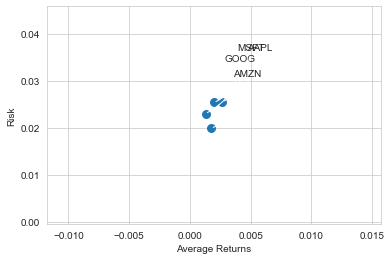

In [30]:
area = np.pi*20 # setting up the area for the circles in the scatter plot
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Average Returns')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label,
                xy=(x,y),xytext = (50,50),
                textcoords = 'offset points',ha = 'right', va = 'bottom',
                arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

#### Looking at the plot above, amazon has the best returns along with a low level of risk.

### Value at risk
It can be defined as the amount of money that a person can expect to loose for a given confidence interval.

Here, bootstrap method will be used.Quantiles will be calculated from a histogram of daily returns.

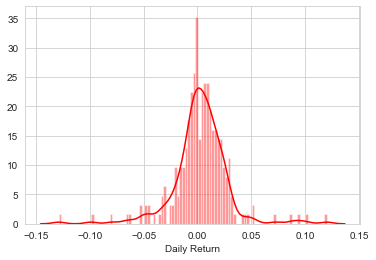

In [31]:
sns.distplot(AAPL['Daily Return'].dropna(),bins = 100, color= 'red')

### Using quantile to get the risk value of the stock

In [32]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-08,-0.020614,-0.013468,-0.000730,0.004843
2019-07-09,0.006099,0.007596,-0.003651,0.018429
2019-07-10,0.009889,0.013913,0.010186,0.014641
2019-07-11,-0.007282,0.003271,0.003990,-0.008100
2019-07-12,0.007683,0.000603,0.003613,0.004962


In [33]:
rets['AAPL'].quantile(0.05)
# This gives the 0.05 empirical quantile of the daily returns

-0.03430130015325128

### The above result is with 95% confidence interval. In other words, if this simulation is run many times, the loss that can be expected from Apple stock is at max 3.4% 95% of the times.

### Using Monte Carlo simulation to predict the value at risk.
The formula is ΔS = S × (μΔt + σϵΔt)

where:
S=the stock price
ΔS=the change in stock price
μ=the expected return
σ=the standard deviation of returns
ϵ=the random variable
Δt=the elapsed time period

In [34]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [35]:
def monte_carlo_stock(start_price,days,mu,sigma):
    price = np.zeros(days) # Defining price as an array of zeros with length equal to 365
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale = sigma*np.sqrt(dt)) # setting epsilon equal to a normal distribution
                    # defined by sigma times square root of dt.
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
    return price

In [36]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-05,1132.880005,1116.140015,1117.800049,1131.589966,1264300,1131.589966
2019-07-08,1125.979980,1111.209961,1125.170044,1116.349976,1236400,1116.349976
2019-07-09,1128.025024,1107.170044,1111.800049,1124.829956,1330400,1124.829956
2019-07-10,1142.050049,1130.969971,1131.219971,1140.479980,1209500,1140.479980
2019-07-11,1153.069946,1139.579956,1143.250000,1144.209961,1195500,1144.209961


Text(0.5, 1.0, 'Monte Carlo Stock Price Analysis of Google')

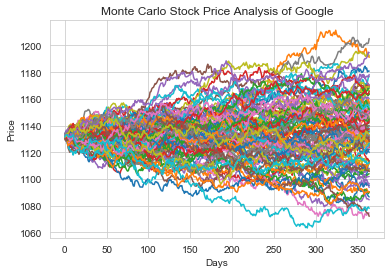

In [42]:
start_price = GOOG['Close'][0]

for trial in range(100):
    plt.plot(monte_carlo_stock(start_price, days, mu, sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Stock Price Analysis of Google')

In [45]:
runs = 10000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = monte_carlo_stock(start_price,days,mu,sigma)[days-1]
# For each of the 10000 runs, the price of the stock on the 365th day is stored at the respective indices of the simulations
# array. For eg, the price on 365th day of the Google stock at the end of first run(run=0) is simulations[0] and so on.

### Plotting histogram using quantiles

Text(0.5, 1.0, 'Final price distribution for Google stock after 365 days')

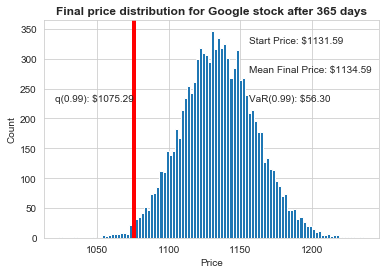

In [53]:
q = np.percentile(simulations,1) # defining 'q' to be 1% empirical quantile. This means that 99% of the values should fit
                                 # within the output
plt.hist(simulations,bins=100)
#Start Price
plt.figtext(0.6,0.8,s="Start Price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6,0.7,"Mean Final Price: $%.2f" %simulations.mean())
# Variance of the price (with 99% confidence interval)
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" %(start_price-q))
# 1% quantile
plt.figtext(0.15,0.6,"q(0.99): $%.2f" %q)
# Plotting a line at 1% quantile result
plt.axvline(x=q,linewidth = 4, color='r')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title("Final price distribution for Google stock after %s days" % days,weight='bold')

### Observations
1. The start price and mean final price for Google stock are very close, suggesting that it is very stable. This can be confirmed by scrolling up to the scatter plot of average mean returns, which shows a near-zero value for Google stock.


2. If the simulation is run 99% of the time, the maximum amount of money that will be at risk will be 56.30 dollars, which isn't a lot compared to the initial investment of 1131.59 dollars.